# Info
Name:  

    Explor_AERONET

Purpose:  

    Explore AERONET values for single sites linked to high altitude AOD values
  
Input:

    none at command line
    see methods of module

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - scipy : for saving and reading
    - math
    - pdb
    - datetime
    - load_utils
  
Needed Files:

    - AEERONET files
  
  
Modification History:

    Wrtten: Samuel LeBlanc, NASA Ames, from Santa Cruz, 2017-05-19
    Modified: 

# Import the required python modules and set paths

In [32]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib notebook

In [33]:
import load_utils as lu

In [34]:
fp = 'C:\\Users\\sleblan2\\Research\\ORACLES\\data_other\\'

In [35]:
fp2 = 'C:\\Users\\sleblan2\\Research\\ORACLES\\data_other_2017\\'

In [36]:
def nat_sort(l):
    n = max([len(j) for j in l])+1
    l.sort(key=lambda x: '{0:0>{n}}'.format(x,n=n).lower())

# Load the files

## Load the Aeronet Mount_Chacaltaya

In [5]:
a = lu.load_aeronet(fp+'150708_150708_Mount_Chacaltaya.lev20')

Opening file: C:\Users\sleblan2\Research\ORACLES\data_other\150708_150708_Mount_Chacaltaya.lev20


In [6]:
a.keys()

['AOT_551',
 'TripletVar_532',
 'AOT_532',
 'AOT_667',
 'AOT_531',
 'TripletVar_412',
 '440675AngstromPolar',
 'AOT_1640',
 'WaterError',
 'AOT_380',
 'Location',
 '500870Angstrom',
 'Dateddmmyy',
 'AOT_412',
 'Email',
 'AOT_555',
 'AOT_490',
 'long',
 'TripletVar_1640',
 'Solar_Zenith_Angle',
 'Last_Processing_Dateddmmyyyy',
 '340440Angstrom',
 'PI',
 'TripletVar_340',
 'AOT_675',
 'TripletVar_531',
 'TripletVar_380',
 'TripletVar_440',
 'TripletVar_500',
 '380500Angstrom',
 'AOT_443',
 'AOT_440',
 'TripletVar_667',
 '440675Angstrom',
 'Timehhmmss',
 'TripletVar_675',
 'Julian_Day',
 'TripletVar_1020',
 'TripletVar_870',
 'TripletVar_443',
 'Watercm',
 'AOT_500',
 'AOT_1020',
 'lat',
 'Nmeas',
 'header',
 '440870Angstrom',
 'AOT_870',
 'TripletVar_490',
 'elev',
 'TripletVar_551',
 'AOT_340',
 'TripletVar_555']

In [80]:
len(a['Timehhmmss'])

55

In [29]:
nm = [float(k[4:]) for k in a.keys() if k.startswith('AOT_')]
nm.sort()

In [31]:
a['wl'] = nm

In [38]:
aods = [k for k in a.keys() if k.startswith('AOT_')]

In [40]:
aods.sort()

In [43]:
aods.sort(key=lambda x: '{0:0>8}'.format(x).lower())

In [44]:
aods

['AOT_340',
 'AOT_380',
 'AOT_412',
 'AOT_440',
 'AOT_443',
 'AOT_490',
 'AOT_500',
 'AOT_531',
 'AOT_532',
 'AOT_551',
 'AOT_555',
 'AOT_667',
 'AOT_675',
 'AOT_870',
 'AOT_1020',
 'AOT_1640']

In [86]:
aod = []
for i in xrange(len(a['Timehhmmss'])):
    u = [a[d][i] for d in aods]
    aod.append(u)
a['aod'] = np.array(aod)

## Load the MLO AERONET

In [14]:
reload(lu)

<module 'load_utils' from 'load_utils.py'>

In [15]:
b = lu.load_aeronet(fp+'20160801_20161031_Mauna_Loa.lev15',version=3)

Opening file: C:\Users\sleblan2\Research\ORACLES\data_other\20160801_20161031_Mauna_Loa.lev15


In [16]:
b.keys()

['AOD_551nm',
 'AOD_532nm',
 'NAOD_531nm',
 'AOD_Empty_6',
 'AOD_500nm',
 '440675_Angstrom_ExponentPolar',
 'NAOD_620nm',
 'AOD_555nm',
 'NAOD_340nm',
 'NAOD_675nm',
 'AOD_Empty_1',
 'AOD_Empty_2',
 'AOD_Empty_3',
 'AOD_Empty_4',
 'AOD_Empty_5',
 'AOD_870nm',
 'NAOD_Empty_2',
 'AOD_779nm',
 'NAOD_551nm',
 'AOD_531nm',
 'NAOD_560nm',
 'AOD_490nm',
 'NAOD_870nm',
 'NAOD_555nm',
 'N500870_Angstrom_Exponent',
 'NAOD_865nm',
 'N440675_Angstrom_ExponentPolar',
 'NPrecipitable_Watercm',
 '440870_Angstrom_Exponent',
 'NAOD_Empty',
 'AOD_440nm',
 'Site_LatitudeDegrees',
 'NAOD_779nm',
 'Precipitable_Watercm',
 'Site_LongitudeDegrees',
 'NAOD_532nm',
 'AOD_510nm',
 'AOD_865nm',
 'AERONET_Instrument_Number',
 'NAOD_412nm',
 'NAOD_1640nm',
 '340440_Angstrom_Exponent',
 'NAOD_400nm',
 'NAOD_1020nm',
 '440675_Angstrom_Exponent',
 'AOD_1640nm',
 'N440675_Angstrom_Exponent',
 'AOD_675nm',
 'AOD_1020nm',
 'AOD_667nm',
 'header',
 'Data_Quality_Level',
 'N440870_Angstrom_Exponent',
 'AOD_380nm',
 'Timeh

In [35]:
nm = [float(k[4:-2]) for k in b.keys() if (k.startswith('AOD_')&k.endswith('nm'))]
nm.sort()

In [36]:
nm

[340.0,
 380.0,
 400.0,
 412.0,
 440.0,
 443.0,
 490.0,
 500.0,
 510.0,
 531.0,
 532.0,
 551.0,
 555.0,
 560.0,
 620.0,
 667.0,
 675.0,
 779.0,
 865.0,
 870.0,
 1020.0,
 1640.0]

In [37]:
b['wl'] = nm

In [49]:
baods = [k for k in b.keys() if (k.startswith('AOD_')&k.endswith('nm'))]

In [64]:
nat_sort(baods)

In [78]:
baods

['AOD_340nm',
 'AOD_380nm',
 'AOD_400nm',
 'AOD_412nm',
 'AOD_440nm',
 'AOD_443nm',
 'AOD_490nm',
 'AOD_500nm',
 'AOD_510nm',
 'AOD_531nm',
 'AOD_532nm',
 'AOD_551nm',
 'AOD_555nm',
 'AOD_560nm',
 'AOD_620nm',
 'AOD_667nm',
 'AOD_675nm',
 'AOD_779nm',
 'AOD_865nm',
 'AOD_870nm',
 'AOD_1020nm',
 'AOD_1640nm']

In [88]:
baod = []
for i in xrange(len(b['Timehhmmss'])):
    u = [b[d][i] for d in baods]
    baod.append(u)
b['aod'] = np.array(baod)

In [91]:
b['aod'].shape

(79L, 22L)

## Load the file for Sao Tomé

In [44]:
c = lu.load_aeronet(fp2+'170801_170930_Sao_Tome.lev10',version=2)

Opening file: C:\Users\sleblan2\Research\ORACLES\data_other_2017\170801_170930_Sao_Tome.lev10


In [45]:
c.keys()

['AOT_551',
 'TripletVar_532',
 'AOT_532',
 'AOT_667',
 'AOT_531',
 'TripletVar_412',
 '440675AngstromPolar',
 'AOT_1640',
 'WaterError',
 'AOT_380',
 'Location',
 '500870Angstrom',
 'Dateddmmyy',
 'AOT_412',
 'Email',
 'AOT_555',
 'AOT_490',
 'long',
 'TripletVar_1640',
 'Solar_Zenith_Angle',
 'Last_Processing_Dateddmmyyyy',
 '340440Angstrom',
 'PI',
 'TripletVar_340',
 'AOT_675',
 'TripletVar_531',
 'TripletVar_380',
 'TripletVar_440',
 'TripletVar_500',
 '380500Angstrom',
 'AOT_443',
 'AOT_440',
 'TripletVar_667',
 '440675Angstrom',
 'Timehhmmss',
 'TripletVar_675',
 'Julian_Day',
 'TripletVar_1020',
 'TripletVar_870',
 'TripletVar_443',
 'Watercm',
 'AOT_500',
 'AOT_1020',
 'lat',
 'Nmeas',
 'header',
 '440870Angstrom',
 'AOT_870',
 'TripletVar_490',
 'elev',
 'TripletVar_551',
 'AOT_340',
 'TripletVar_555']

In [46]:
from datetime import datetime, timedelta

In [47]:
list(c['Julian_Day'])

[221.37104199999999,
 221.43354199999999,
 221.456458,
 221.49604199999999,
 221.50020799999999,
 221.50230300000001,
 221.50438700000001,
 221.50647000000001,
 221.50855300000001,
 221.55022,
 221.55646999999999,
 221.581447,
 221.58353,
 221.58769699999999,
 221.59186299999999,
 221.59394699999999,
 221.59603000000001,
 221.59811300000001,
 221.60020800000001,
 221.60436300000001,
 221.606447,
 221.608542,
 221.610613,
 221.61788200000001,
 221.62520799999999,
 221.63721100000001,
 221.63864599999999,
 221.64584500000001,
 221.65324100000001,
 221.67262700000001,
 221.67979199999999,
 221.69583299999999,
 221.69847200000001,
 221.70574099999999,
 222.41055600000001,
 222.41472200000001,
 222.41680600000001,
 222.41887700000001,
 222.67706000000001,
 222.68900500000001,
 222.690405,
 222.69181699999999,
 222.693218,
 222.69461799999999,
 223.310428,
 223.375336,
 223.39588000000001,
 223.397963,
 223.41045099999999,
 223.41254599999999,
 223.41462999999999,
 223.41671299999999,
 223.4

In [48]:
dt = [datetime(2017,1,1)+timedelta(jd-1) for jd in list(c['Julian_Day'])]

<IPython.core.display.Javascript object>


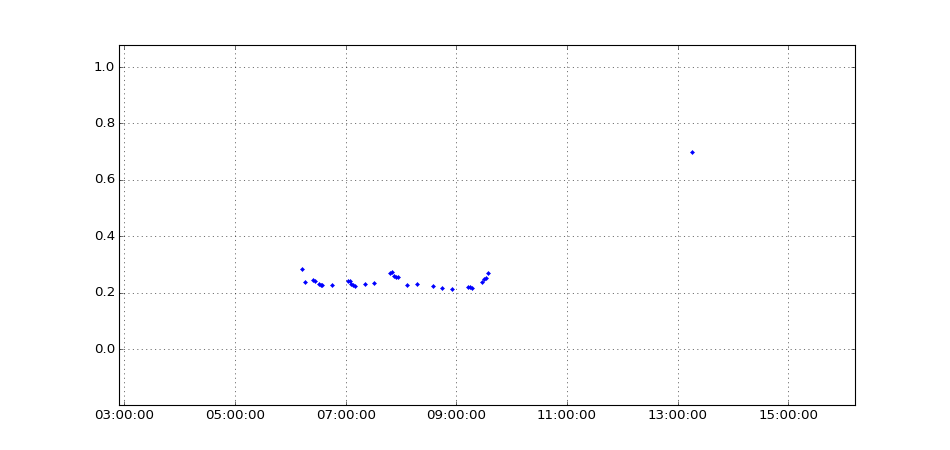

In [49]:
plt.figure()
plt.plot(dt,c['AOT_500'],'.')
plt.grid()

## Load the Ascension island aeronet data (from the airport)

In [50]:
d = lu.load_aeronet(fp2+'170801_170930_Ascension_Island.lev15',version=2)

Opening file: C:\Users\sleblan2\Research\ORACLES\data_other_2017\170801_170930_Ascension_Island.lev15


In [51]:
d['dt'] = [datetime(2017,1,1)+timedelta(jd-1) for jd in list(d['Julian_Day'])]

<IPython.core.display.Javascript object>


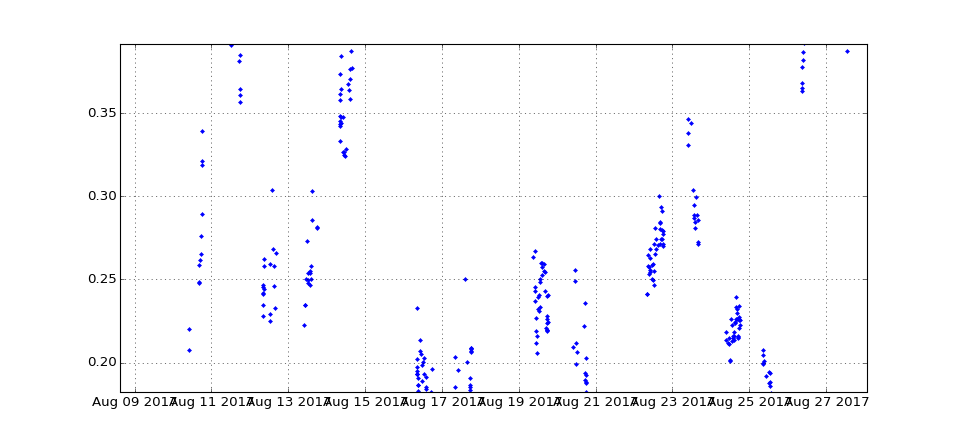

In [53]:
plt.figure()
plt.plot(d['dt'],d['AOT_500'],'.')
plt.grid()

# Plot out the AOD spectra for each point

## Plot out the Mount_Chacaltaya aeronet

<IPython.core.display.Javascript object>


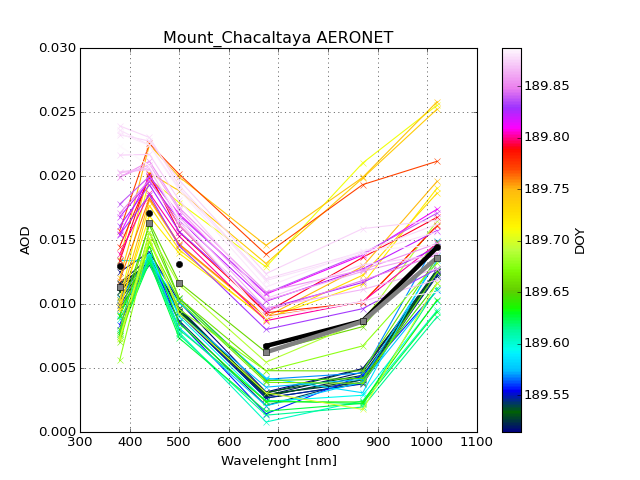

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:2: MatplotlibDeprecationWarning: The normalize class alias was deprecated in version 1.3. Use Normalize instead.
  from ipykernel import kernelapp as app


In [169]:
fig,ax = plt.subplots(1)
s_m = plt.cm.ScalarMappable(cmap=plt.cm.gist_ncar, norm=plt.normalize(vmin=min(a['Julian_Day']),vmax=max(a['Julian_Day'])))
s_m.set_array([])
for i,j in enumerate(a['Julian_Day']):
    im = np.isfinite(a['aod'][i,:])
    plt.plot(np.array(a['wl'])[im],a['aod'][i,im],'x-',color=s_m.to_rgba(j))
plt.plot(a['wl'],np.nanmean(a['aod'],axis=0),'o-k',zorder=200,lw=4)
plt.plot(a['wl'],np.nanmedian(a['aod'],axis=0),'s-',color='grey',zorder=200,lw=4)
plt.title('Mount_Chacaltaya AERONET')
plt.xlabel('Wavelenght [nm]')
plt.ylabel('AOD')
plt.grid()
cb = plt.colorbar(s_m, format='%3.2f')
cb.set_label('DOY')
plt.savefig(fp+'AERONET_Chacaltaya_high_alt_AOD_log_sept_2016.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


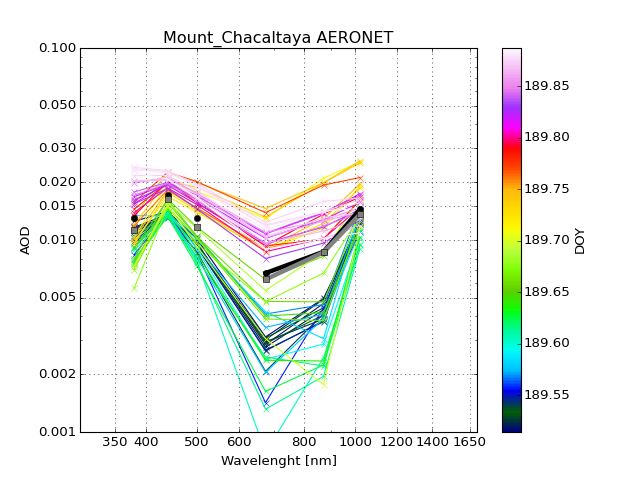

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:2: MatplotlibDeprecationWarning: The normalize class alias was deprecated in version 1.3. Use Normalize instead.
  from ipykernel import kernelapp as app


In [170]:
fig,ax = plt.subplots(1)
s_m = plt.cm.ScalarMappable(cmap=plt.cm.gist_ncar, norm=plt.normalize(vmin=min(a['Julian_Day']),vmax=max(a['Julian_Day'])))
s_m.set_array([])
for i,j in enumerate(a['Julian_Day']):
    im = np.isfinite(a['aod'][i,:])
    plt.plot(np.array(a['wl'])[im],a['aod'][i,im],'x-',color=s_m.to_rgba(j))
plt.plot(a['wl'],np.nanmean(a['aod'],axis=0),'o-k',zorder=200,lw=4)
plt.plot(a['wl'],np.nanmedian(a['aod'],axis=0),'s-',color='grey',zorder=200,lw=4)
plt.title('Mount_Chacaltaya AERONET')
plt.xlabel('Wavelenght [nm]')
plt.ylabel('AOD')
plt.grid()

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.001,0.1)
ax.set_xlim(300.0,1700.0)
plt.xticks([350,400,500,600,800,1000,1200,1400,1650])
plt.yticks([0.001,0.002,0.005,0.01,0.015,0.02,0.03,0.05,0.1])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

cb = plt.colorbar(s_m, format='%3.2f')
cb.set_label('DOY')
plt.savefig(fp+'AERONET_Chacaltaya_high_alt_AOD_log_sept_2016.png',dpi=600,transparent=True)

## Plot out the MLO AERONET

<IPython.core.display.Javascript object>


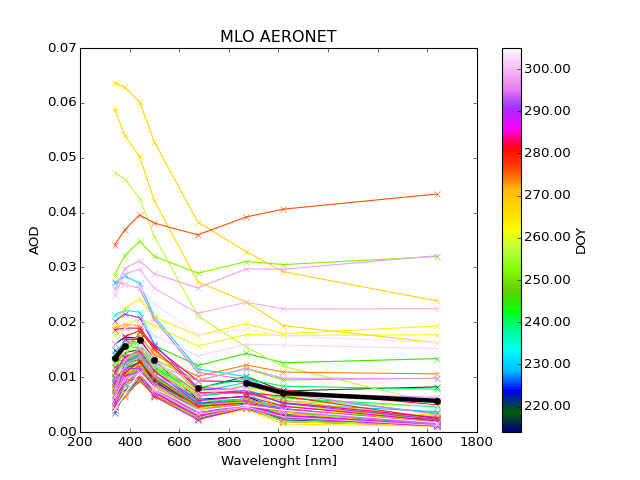

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:2: MatplotlibDeprecationWarning: The normalize class alias was deprecated in version 1.3. Use Normalize instead.
  from ipykernel import kernelapp as app


In [166]:
fig,ax = plt.subplots(1)
s_m = plt.cm.ScalarMappable(cmap=plt.cm.gist_ncar, norm=plt.normalize(vmin=min(b['Day_of_Year']),vmax=max(b['Day_of_Year'])))
s_m.set_array([])
for i,j in enumerate(b['Day_of_Year']):
    b['aod'][i,b['aod'][i,:]==-999] = np.nan
    im = np.isfinite(b['aod'][i,:])
    plt.plot(np.array(b['wl'])[im],b['aod'][i,im],'x-',color=s_m.to_rgba(j))
plt.plot(b['wl'],np.nanmean(b['aod'],axis=0),'o-k',zorder=200,lw=4)
plt.title('MLO AERONET')
plt.xlabel('Wavelenght [nm]')
plt.ylabel('AOD')
cb = plt.colorbar(s_m, format='%3.2f')
cb.set_label('DOY')
plt.savefig(fp+'AERONET_MLO_high_alt_AOD_sept_2016.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


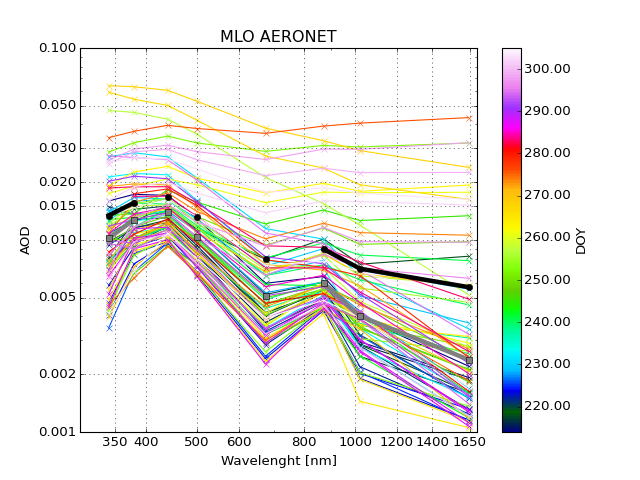

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:2: MatplotlibDeprecationWarning: The normalize class alias was deprecated in version 1.3. Use Normalize instead.
  from ipykernel import kernelapp as app


In [165]:
fig,ax = plt.subplots(1)
s_m = plt.cm.ScalarMappable(cmap=plt.cm.gist_ncar, norm=plt.normalize(vmin=min(b['Day_of_Year']),vmax=max(b['Day_of_Year'])))
s_m.set_array([])
for i,j in enumerate(b['Day_of_Year']):
    b['aod'][i,b['aod'][i,:]==-999] = np.nan
    im = np.isfinite(b['aod'][i,:])
    plt.plot(np.array(b['wl'])[im],b['aod'][i,im],'x-',color=s_m.to_rgba(j))
plt.plot(b['wl'],np.nanmean(b['aod'],axis=0),'o-k',zorder=200,lw=4)
plt.plot(b['wl'],np.nanmedian(b['aod'],axis=0),'s-',color='grey',zorder=200,lw=4)
plt.title('MLO AERONET')
plt.xlabel('Wavelenght [nm]')
plt.ylabel('AOD')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.001,0.1)
ax.set_xlim(300.0,1700.0)
plt.xticks([350,400,500,600,800,1000,1200,1400,1650])
plt.yticks([0.001,0.002,0.005,0.01,0.015,0.02,0.03,0.05,0.1])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
plt.grid()

cb = plt.colorbar(s_m, format='%3.2f')
cb.set_label('DOY')
plt.savefig(fp+'AERONET_MLO_high_alt_AOD_log_sept_2016.png',dpi=600,transparent=True)

In [162]:
np.array(b['wl'])[im],np.nanmean(b['aod'][:,im],axis=0),np.nanmedian(b['aod'][:,im],axis=0)

(array([  340.,   380.,   440.,   500.,   675.,   870.,  1020.,  1640.]),
 array([ 0.01341534,  0.01563484,  0.01673158,  0.01320213,  0.00794751,
         0.00896252,  0.00709206,  0.00568186]),
 array([ 0.010195,  0.01278 ,  0.013907,  0.010327,  0.005127,  0.005983,
         0.004015,  0.002382]))

<IPython.core.display.Javascript object>


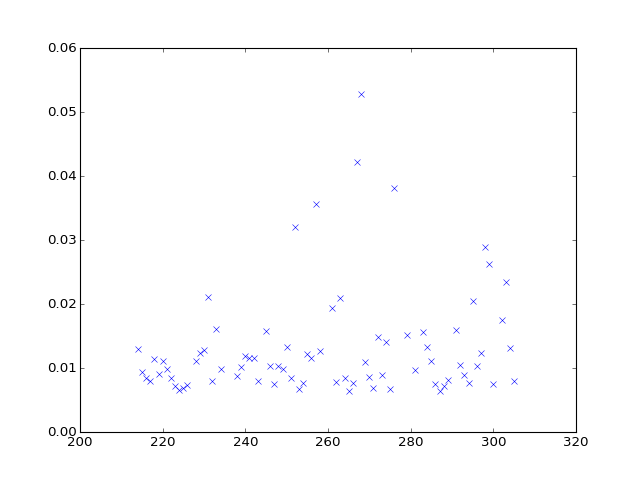

In [172]:
plt.figure()
plt.plot(b['Day_of_Year'],b['aod'][:,7],'x')